In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Data_Train.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Analysis
- Price is the only Numerical column
- Total 11 columns 
- There are 2 NAN values, and they are in same row (Air India) , they are Route and Total stops
- There are total 12 Airlines: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
 - There are total 5 Sources: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
 - Total 6 Destination: ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
 - 5 types of stops: ['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
 - Total 10 additional information
- this data is of year 2019
- April has the least no of flights
- June has the most no of flights

# Question/Answer
- Which is the most and least used fight?
- **Jet Airways is the most used**
- **Trujet is the least used**
- Which State has more and less number of flights?   
- **Most of the fligts are from Delhi and least form Chennai**
- **Most of the destination is Chennai and least Kolkata**
- How many Non Stop flights are there?
- **5625**
- How many 1 Stop flights are there?
- **3491**
- How many 2 Stop flights are there?
- **1520**
- How many 3 Stop flights are there?
- **45**
- How many 4 Stop flights are there?
- Only one flight with 4 stops( Air India)
- Which days have the most and least booking?
- **6th and 4th of every month respectively**
- Which day of week has more no of flights?
- **Thursday has more no of flights and Monday the least**

In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


df.isnull().sum()

In [8]:
## We can drop this row as it contain 2 NAN values

df[df.isnull().any(axis=1)]  

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(10682, 11)

#### Uniques Categorical Variables

In [11]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
for i in ['Airline', 'Source','Destination','Total_Stops','Additional_Info']:
    print('Total:',len(df[i].unique()),'\n')
    print(df[i].unique())

Total: 12 

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Total: 5 

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Total: 6 

['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Total: 5 

['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
Total: 10 

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


<AxesSubplot:>

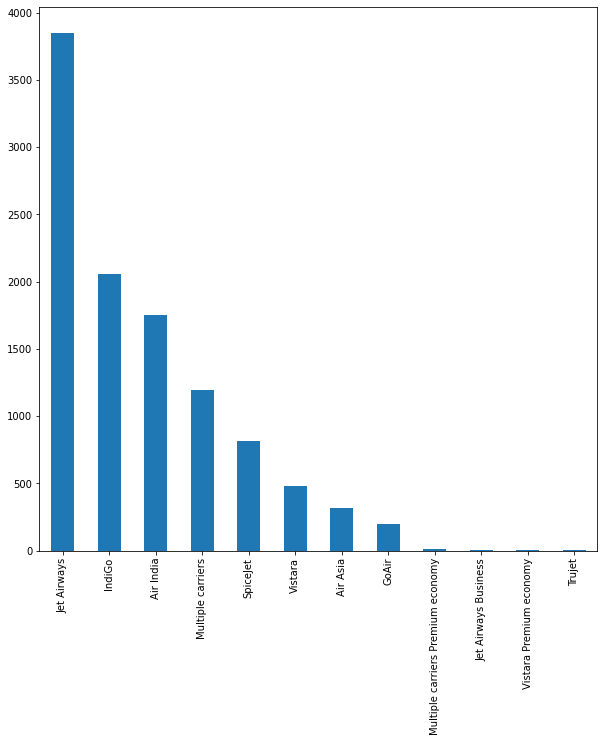

In [13]:
df['Airline'].value_counts().plot.bar(figsize=(10,10))

<AxesSubplot:>

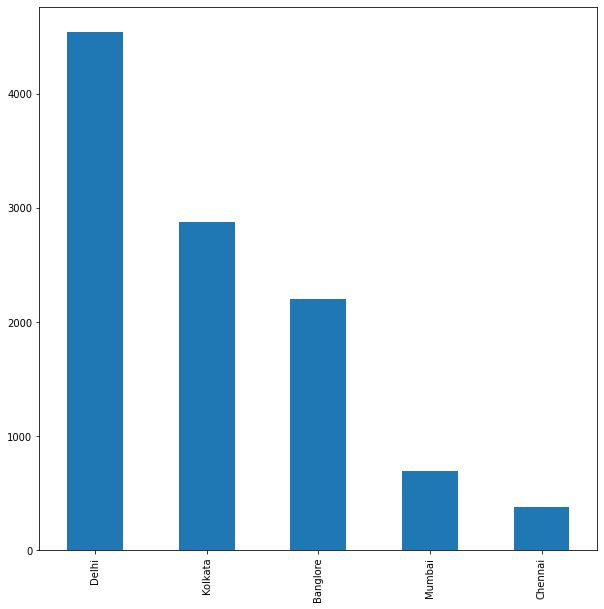

In [14]:
df['Source'].value_counts().plot.bar(figsize=(10,10))

<AxesSubplot:>

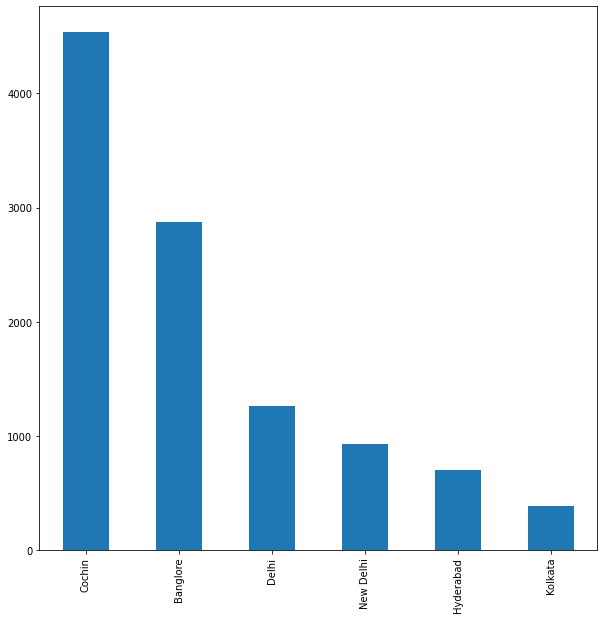

In [15]:
df['Destination'].value_counts().plot.bar(figsize=(10,10))

In [16]:
df[df['Total_Stops'] == '4 stops']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9182,Air India,01/03/2019,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4 stops,Change airports,17686


In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [18]:
type(df.Date_of_Journey)

pandas.core.series.Series

In [19]:
df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey)

In [20]:
df.Date_of_Journey.dtype

dtype('<M8[ns]')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.4+ KB


In [22]:
df['Year'] = df.Date_of_Journey.dt.year
df['Month'] = df.Date_of_Journey.dt.month

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1


In [24]:
df.Year.unique()

array([2019], dtype=int64)

<AxesSubplot:>

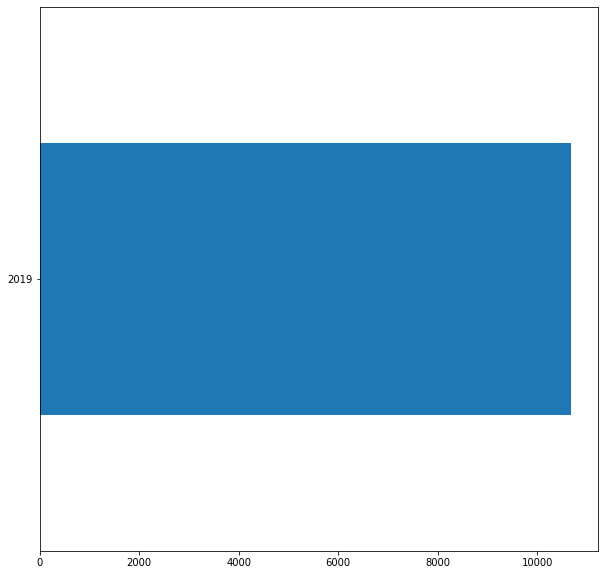

In [25]:
df.Year.value_counts().plot.barh(figsize=(10,10))

<AxesSubplot:>

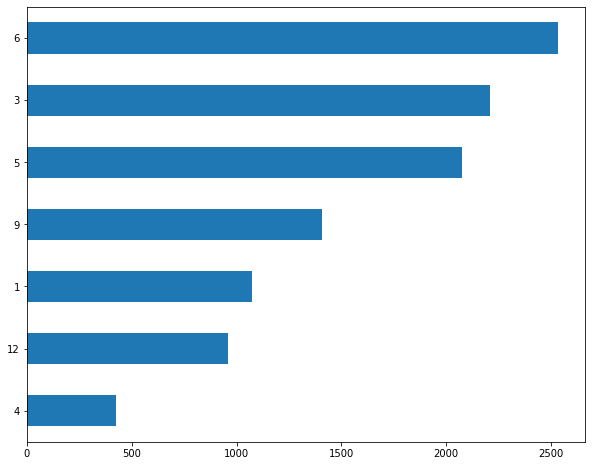

In [26]:
df.Month.value_counts(ascending=True).plot.barh(figsize=(10,8))

In [27]:
df.Month.value_counts()

6     2535
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Month, dtype: int64

In [28]:
df['date'] = df.Date_of_Journey.dt.day

In [29]:
df.date

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: date, Length: 10682, dtype: int64

<AxesSubplot:>

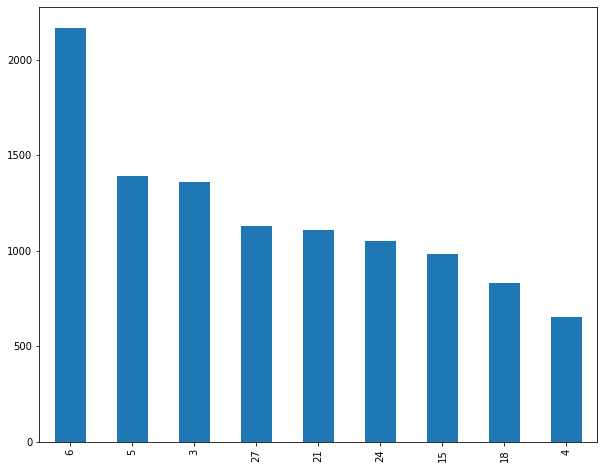

In [30]:
df.date.value_counts().plot.bar(figsize=(10,8))

In [31]:
import datetime
df['Week']  = df.Date_of_Journey.dt.dayofweek

In [32]:
df.Week

0        6
1        5
2        4
3        3
4        3
        ..
10678    2
10679    5
10680    5
10681    3
10682    3
Name: Week, Length: 10682, dtype: int64

In [33]:
weekday = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df.Week = df.Week.map(weekday)

In [34]:
df.Week

0        Sun
1        Sat
2        Fri
3        Thu
4        Thu
        ... 
10678    Wed
10679    Sat
10680    Sat
10681    Thu
10682    Thu
Name: Week, Length: 10682, dtype: object

<AxesSubplot:>

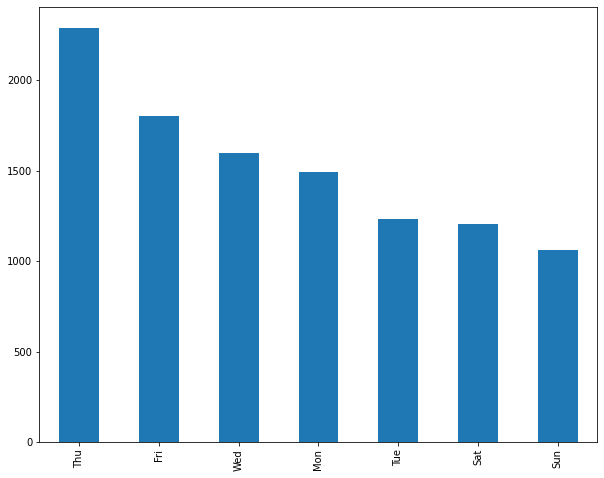

In [35]:
df.Week.value_counts().plot.bar(figsize= (10,8))

In [36]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_hr'] = df.Dep_Time.dt.hour
df['Dep_min'] = df.Dep_Time.dt.hour

In [37]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arr_hr'] = df.Arrival_Time.dt.hour
df['Arr_min'] = df.Arrival_Time.dt.hour

In [38]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-21 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,Sun,22,22,1,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-21 05:50:00,2021-05-21 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,Sat,5,5,13,13
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-21 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6,Fri,9,9,4,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-21 18:05:00,2021-05-21 23:30:00,5h 25m,1 stop,No info,6218,2019,12,5,Thu,18,18,23,23
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-21 16:50:00,2021-05-21 21:35:00,4h 45m,1 stop,No info,13302,2019,1,3,Thu,16,16,21,21


In [39]:
duration = list(df['Duration'])

for i in range(len(duration)):
    if(len(duration[i].split()) !=2):
        if('h' in duration[i]):
            duration[i] = duration[i].strip()+' 0m'
        else:
            duration[i] = '0h '+ duration[i]

duration_hr = []
duration_min = []

for i in range(len(duration)):
    duration_hr.append(int(duration[i].split(sep='h')[0]))
    duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [40]:
df['Dur_hr'] = duration_hr
df['Dur_min'] = duration_min

In [41]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-21 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,Sun,22,22,1,1,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-21 05:50:00,2021-05-21 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,Sat,5,5,13,13,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-21 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6,Fri,9,9,4,4,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-21 18:05:00,2021-05-21 23:30:00,5h 25m,1 stop,No info,6218,2019,12,5,Thu,18,18,23,23,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-21 16:50:00,2021-05-21 21:35:00,4h 45m,1 stop,No info,13302,2019,1,3,Thu,16,16,21,21,4,45


In [42]:
#### Deleting Date_of_Journey, Dep_Time, Arrivl_Time, and Duration
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'],axis=1,inplace=True)

In [43]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Year,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,Sun,22,22,1,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,Sat,5,5,13,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,Fri,9,9,4,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,Thu,18,18,23,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,Thu,16,16,21,21,4,45


In [44]:
df['Day_Night'] = np.where(df['Arr_hr']>19,'Night_flight','Day_flight')

In [45]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Year,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min,Day_Night
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,Sun,22,22,1,1,2,50,Day_flight
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,Sat,5,5,13,13,7,25,Day_flight
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,Fri,9,9,4,4,19,0,Day_flight
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,Thu,18,18,23,23,5,25,Night_flight
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,Thu,16,16,21,21,4,45,Night_flight


In [46]:
### Removing the duplicated features
df = df.drop_duplicates()

In [47]:
df.shape

(10439, 18)

## Feature Engineering

In [48]:
df.shape

(10439, 18)

In [49]:
### dropping Jet Airways as its not working now

df.drop(df[df['Airline'] == 'Jet Airways'].index,inplace=True)

In [50]:
df.shape

(6739, 18)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

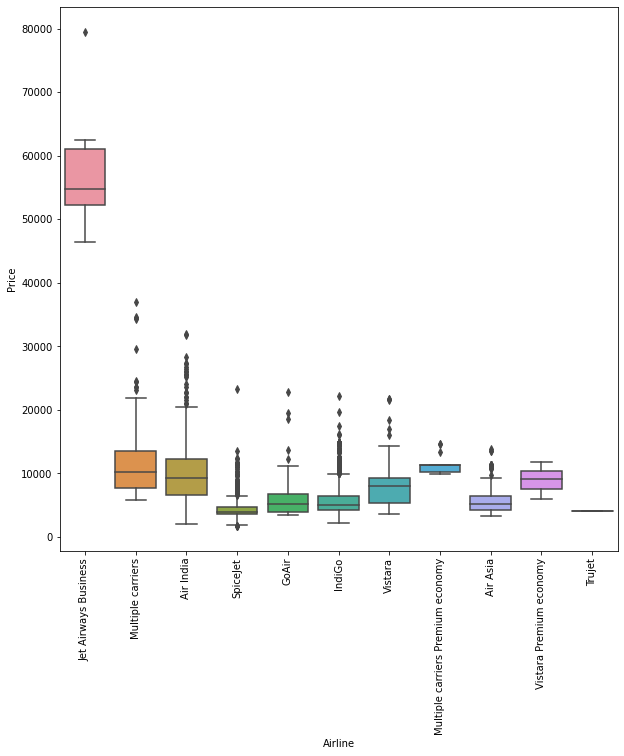

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation=90)

sns.boxplot(x='Airline',y='Price',ax=ax,data= df.sort_values('Price',ascending=False))

In [52]:
airline = df[['Airline']]
airline = pd.get_dummies(airline,drop_first=True)
airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10677,0,0,0,0,0,0,1,0,0,0
10678,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,1,0


In [53]:
source = df[['Source']]
source = pd.get_dummies(source,drop_first=True)
source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0
...,...,...,...,...
10677,0,0,0,0
10678,0,0,1,0
10679,0,0,1,0
10681,0,0,0,0


In [54]:
destination = df[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0
...,...,...,...,...,...
10677,0,1,0,0,0
10678,0,0,0,0,0
10679,0,0,0,0,0
10681,0,0,0,0,1


In [55]:
DN = df[['Day_Night']]
DN = pd.get_dummies(DN,drop_first=True)
DN

,Day_Night_Night_flight
0,0
1,0
3,1
4,1
5,0
...,...
10677,0
10678,1
10679,1
10681,0


In [56]:
#### Route and Total stops are almost same they are giving the same data
#### so we can drop Route
df.drop('Route',axis=1,inplace=True)

In [57]:
df.Additional_Info.value_counts(normalize=True)

No info                         0.935154
No check-in baggage included    0.047188
In-flight meal not included     0.014245
1 Long layover                  0.001039
Change airports                 0.001039
Business class                  0.000445
No Info                         0.000445
1 Short layover                 0.000148
Red-eye flight                  0.000148
2 Long layover                  0.000148
Name: Additional_Info, dtype: float64

In [58]:
##### Additional Info has more than 93% of the values as NO- Info 
##### so we can drop this also
df.drop('Additional_Info',axis=1,inplace=True)

In [59]:
df.Total_Stops.value_counts(normalize=True)

1 stop      0.458525
non-stop    0.419944
2 stops     0.115002
3 stops     0.006381
4 stops     0.000148
Name: Total_Stops, dtype: float64

In [60]:
### As price increase when the stops are more(According to the dataset) so Ordinal encoding is required
stops = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
df['Total_Stops'] = df.Total_Stops.map(stops)

In [61]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Year,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min,Day_Night
0,IndiGo,Banglore,New Delhi,0,3897,2019,3,24,Sun,22,22,1,1,2,50,Day_flight
1,Air India,Kolkata,Banglore,2,7662,2019,1,5,Sat,5,5,13,13,7,25,Day_flight
3,IndiGo,Kolkata,Banglore,1,6218,2019,12,5,Thu,18,18,23,23,5,25,Night_flight
4,IndiGo,Banglore,New Delhi,1,13302,2019,1,3,Thu,16,16,21,21,4,45,Night_flight
5,SpiceJet,Kolkata,Banglore,0,3873,2019,6,24,Mon,9,9,11,11,2,25,Day_flight


In [62]:
df = pd.concat([df,airline,source,destination,DN],axis=1)

In [63]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Year,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min,Day_Night,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_Night_Night_flight
0,IndiGo,Banglore,New Delhi,0,3897,2019,3,24,Sun,22,22,1,1,2,50,Day_flight,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Air India,Kolkata,Banglore,2,7662,2019,1,5,Sat,5,5,13,13,7,25,Day_flight,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,2019,12,5,Thu,18,18,23,23,5,25,Night_flight,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,IndiGo,Banglore,New Delhi,1,13302,2019,1,3,Thu,16,16,21,21,4,45,Night_flight,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
5,SpiceJet,Kolkata,Banglore,0,3873,2019,6,24,Mon,9,9,11,11,2,25,Day_flight,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [64]:
#### Now we can drop the unwanted columns

df.drop(['Airline','Source','Destination','Day_Night','Year'],axis=1,inplace=True)

In [65]:
weekday = {'Mon':0,'Tue':1,'Wed':2,'Thu':3,'Fri':4,'Sat':5,'Sun':6}

df.Week = df.Week.map(weekday)

In [66]:
df.head()

,Total_Stops,Price,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_Night_Night_flight
0,0,3897,3,24,6,22,22,1,1,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,7662,1,5,5,5,5,13,13,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,3,18,18,23,23,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,13302,1,3,3,16,16,21,21,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
5,0,3873,6,24,0,9,9,11,11,2,25,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [67]:
df.shape

(6739, 31)

## Feature Selection

In [68]:
X = df.drop(['Price'],axis=1)
y = df['Price']

In [69]:
X.head()

,Total_Stops,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_Night_Night_flight
0,0,3,24,6,22,22,1,1,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,1,5,5,5,5,13,13,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,12,5,3,18,18,23,23,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,1,3,3,16,16,21,21,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
5,0,6,24,0,9,9,11,11,2,25,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=123)

In [71]:
from sklearn.feature_selection import VarianceThreshold,SelectKBest,mutual_info_classif
v = VarianceThreshold(threshold=0.001)
v.fit(X_train)
v.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [72]:
v.get_support().sum() ### not constant features

28

In [73]:
const_col = [col for col in X_train.columns if col not in X_train.columns[v.get_support()]]
len(const_col)

2

In [74]:
for col in const_col:
    print(col)

Airline_Trujet
Airline_Vistara Premium economy


In [75]:
X_train_v = X_train.drop(['Airline_Trujet','Airline_Vistara Premium economy'],axis=1)
X_test_v = X_test.drop(['Airline_Trujet','Airline_Vistara Premium economy'],axis=1)

In [76]:
# X_train_v = v.transform(X_train)
# X_test_v = v.transform(X_test)

In [77]:
X_train_v.shape,X_test_v.shape

((4717, 28), (2022, 28))

In [78]:
X_train_v.head()

,Total_Stops,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_Night_Night_flight
1087,0,5,18,5,20,20,21,21,1,35,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3616,0,6,27,3,19,19,22,22,2,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8292,1,12,6,4,17,17,9,9,16,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6291,0,3,21,3,19,19,21,21,2,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4124,1,3,27,2,9,9,15,15,6,30,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [79]:
# X_train_v = pd.DataFrame(X_train_v)
# X_test_v = pd.DataFrame(X_test_v)

In [80]:
X_train_v.head()

,Total_Stops,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_Night_Night_flight
1087,0,5,18,5,20,20,21,21,1,35,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3616,0,6,27,3,19,19,22,22,2,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8292,1,12,6,4,17,17,9,9,16,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6291,0,3,21,3,19,19,21,21,2,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4124,1,3,27,2,9,9,15,15,6,30,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [81]:
# mi = mutual_info_classif(X_train_v,y_train)
# mi = pd.Series(mi)
# mi.index = X_train_v.columns

In [82]:
# ### As most of the features are in use then we dont need to drop now

# mi.sort_values().plot.bar(figsize=(10,8))  

In [83]:
# plt.figure(figsize=(18,18))
# sns.heatmap(X_train_v.corr(),annot=True)

In [84]:
# sel = SelectKBest(mutual_info_classif,k=20).fit(X_train_v,y_train)
# X_train_mi = sel.transform(X_train_v)
# X_test_mi = sel.transform(X_test_v)

In [85]:
mi = mutual_info_classif(X_train_v,y_train)
mi = pd.Series(mi)
mi.index = X_train_v.columns
mi.sort_values()

Airline_Multiple carriers Premium economy    0.010672
Airline_Jet Airways Business                 0.015384
Airline_GoAir                                0.134389
Source_Chennai                               0.246959
Destination_Kolkata                          0.270052
Destination_New Delhi                        0.277532
Airline_Vistara                              0.316648
Destination_Hyderabad                        0.334998
Source_Mumbai                                0.346575
Airline_SpiceJet                             0.494961
Destination_Delhi                            0.519115
Day_Night_Night_flight                       0.533009
Week                                         0.620642
Month                                        0.731812
Airline_Multiple carriers                    0.914841
date                                         0.942493
Source_Kolkata                               1.001512
Airline_IndiGo                               1.132821
Airline_Air India           

<AxesSubplot:>

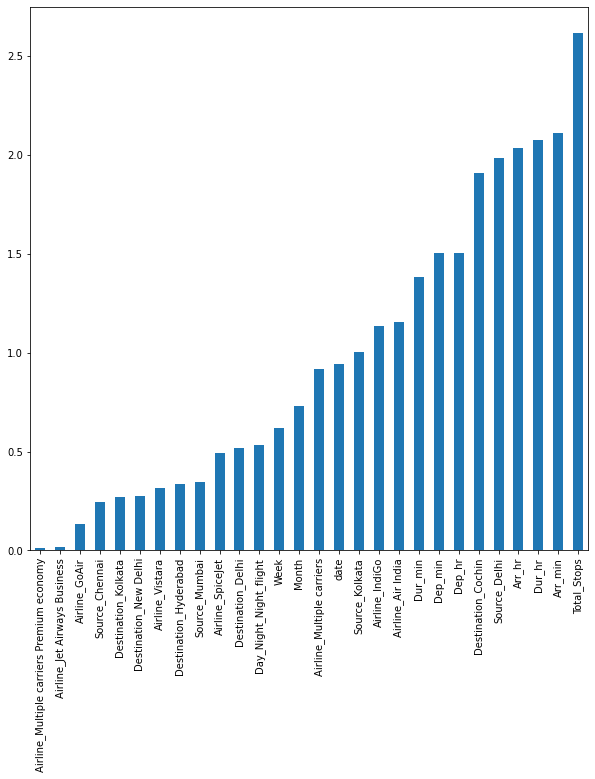

In [86]:
mi.sort_values().plot.bar(figsize=(10,10))

In [87]:
sel = SelectKBest(mutual_info_classif,k=26)
sel.fit(X_train_v,y_train)
X_train_v.columns[sel.get_support()]

Index(['Total_Stops', 'Month', 'date', 'Week', 'Dep_hr', 'Dep_min', 'Arr_hr',
       'Arr_min', 'Dur_hr', 'Dur_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Day_Night_Night_flight'],
      dtype='object')

In [88]:
X_train_mi = X_train_v[['Total_Stops', 'Month', 'date', 'Week', 'Dep_hr', 'Dep_min', 'Arr_hr',
       'Arr_min', 'Dur_hr', 'Dur_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Day_Night_Night_flight']]

In [89]:
X_test_mi = X_test_v[['Total_Stops', 'Month', 'date', 'Week', 'Dep_hr', 'Dep_min', 'Arr_hr',
       'Arr_min', 'Dur_hr', 'Dur_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Day_Night_Night_flight']]

In [90]:
X_train_mi.shape, X_test_mi.shape

((4717, 25), (2022, 25))

## Model Creation

R2 Score:  0.7854894197456445
Mean absolute Score:  867.4546353445434
Mean Square Score:  3595051.772119917
Root Mean Square Error:  1896.0621751725118


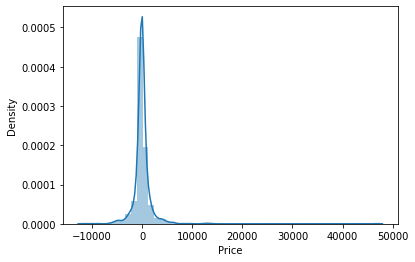

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import pickle

rf = RandomForestRegressor(random_state=123)
rf.fit(X_train_mi,y_train)
y_pred = rf.predict(X_test_mi)
print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean absolute Score: ', mean_absolute_error(y_test,y_pred))
print('Mean Square Score: ', mean_squared_error(y_test,y_pred))
print('Root Mean Square Error: ', np.sqrt(mean_squared_error(y_test,y_pred)))
sns.distplot(y_test-y_pred)
with open('flight_pd.pkl','wb') as f:
    pickle.dump(rf,f)
    

R2 Score:  0.8118281392422158
Mean absolute Score:  864.7241350953008
Mean Square Score:  3153632.705101214
Root mean Square Error  1775.8470387680393


<AxesSubplot:xlabel='Price', ylabel='Density'>

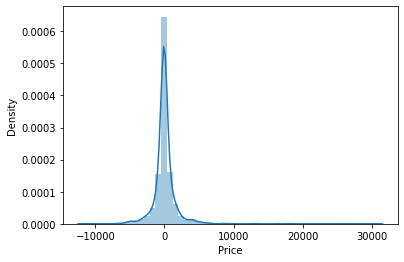

In [92]:
rf = RandomForestRegressor(random_state=123)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean absolute Score: ', mean_absolute_error(y_test,y_pred))
print('Mean Square Score: ', mean_squared_error(y_test,y_pred))
print('Root mean Square Error ', np.sqrt(mean_squared_error(y_test,y_pred)))
sns.distplot(y_test-y_pred)


In [93]:
rf_random = RandomForestRegressor(n_estimators=712,min_samples_split=2,min_samples_leaf=16,max_features='auto',max_depth=20,random_state=123)

In [94]:
rf_random.fit(X_train_mi,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=16, n_estimators=712,
                      random_state=123)

In [95]:
prd = rf_random.predict(X_test_mi)

In [96]:
print('R2 Score: ',r2_score(y_test,prd))

R2 Score:  0.7170714490124026


In [97]:
X_train_mi.head()

,Total_Stops,Month,date,Week,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hr,Dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_Night_Night_flight
1087,0,5,18,5,20,20,21,21,1,35,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
3616,0,6,27,3,19,19,22,22,2,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
8292,1,12,6,4,17,17,9,9,16,5,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
6291,0,3,21,3,19,19,21,21,2,20,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
4124,1,3,27,2,9,9,15,15,6,30,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0


In [98]:
X_train_mi.columns

Index(['Total_Stops', 'Month', 'date', 'Week', 'Dep_hr', 'Dep_min', 'Arr_hr',
       'Arr_min', 'Dur_hr', 'Dur_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Day_Night_Night_flight'],
      dtype='object')

In [100]:
X_train_mi.Week.unique()

array([5, 3, 4, 2, 1, 6, 0], dtype=int64)